#remove K16b transits (primary star and sec star) from lightcurve

In [1]:
#can we find K16 while assuming basic values for the e and i parameters?
import copy
import numpy as np
import matplotlib.pyplot as p
import astropy.units as u
import funcs

%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
lc = np.genfromtxt('K16_clean_noecl.txt')
time = lc[:,0]+2454833
flux = lc[:,1]
err = lc[:,2]

In [3]:
# Kepler 16
cb = funcs.CBSystem(m1 = 0.6897,f1 = 1.,m2 = 0.20255,f2 = 0.01555,
                    ab = 0.22431,r1 = 0.6489 * u.Rsun.to('au'),r2 = 0.22623 * u.Rsun.to('au'),
                    eb = 0.15944,ib = np.deg2rad(90.3401),wb = np.deg2rad(263.464),
                    fb = np.deg2rad(186.53239),
                    mp = .03e-3,ap = 0.7048,rp = 0.7538 * u.Rjupiter.to('au'),ep = 0.0069,
                    ip = np.deg2rad(90.0322),wp = np.deg2rad(318.0),fp = np.deg2rad(148.92),
                    Wp = np.deg2rad(0.003),
                    t0 = 2455212.12316)
ab0 = cb.ab
mb0 = cb.m1 + cb.m2
p_p0 = (cb.ap**3/(cb.m1+cb.m2))**(1./2.)*365.25 #in days
fp0 = np.deg2rad(148.92)
print(1/np.sqrt( (cb.m1+cb.m2)/cb.ab**3 )*365.25)
print(p_p0)

timing_precision = 30./86400./365.25 * (2*np.pi)  #in years/2pi
dt = 0.02
#t = np.arange(2454953,2456424,dt)
#t = np.arange(np.min(time),np.max(time),dt)
t = time

41.0790034492
228.79461019691053


In [5]:
#tts = funcs.reb_cb(cb,tmin=np.min(t),tmax=np.max(t))
tts_2,tds_2 = funcs.reb_cb_dvm(cb,0,2,tmin=np.min(t),tmax=np.max(t), timing_precision=timing_precision)
tts_sec,tds_sec = funcs.reb_cb_dvm(cb,1,2,tmin=np.min(t),tmax=np.max(t), timing_precision=timing_precision)

#ok = tts[:,0] == 20
#ref_tts = tts[ok]
ref_tts = tts_2[tds_2>0]
ref_tds = tds_2[tds_2>0]
ref_tts_sec = tts_sec[tds_sec>0]
ref_tds_sec = tds_sec[tds_sec>0]
print(ref_tts)
print(ref_tts_sec)

[ 2454973.42262594  2455203.69855133  2455425.21181695  2455655.48738862
  2455876.9974707   2456107.27304238  2456328.77339701]
[ 2454981.58642881  2455195.30217409  2455647.12620704]


In [9]:
cut = np.zeros(len(time),dtype='bool')
for point in range(len(time)):
    if np.min(np.abs(ref_tts-time[point])) < p_p0/8.: #avoids too much for-looping
        for transit,dur in zip(ref_tts,ref_tds):
            if np.abs(transit - time[point]) <= dur:
                cut[point] = 1
        for transit,dur in zip(ref_tts_sec,ref_tds_sec):
            if np.abs(transit - time[point]) <= dur:
                cut[point] = 1
print(np.sum(cut))

202


In [10]:
lc = lc[~cut,:]

<IPython.core.display.Javascript object>


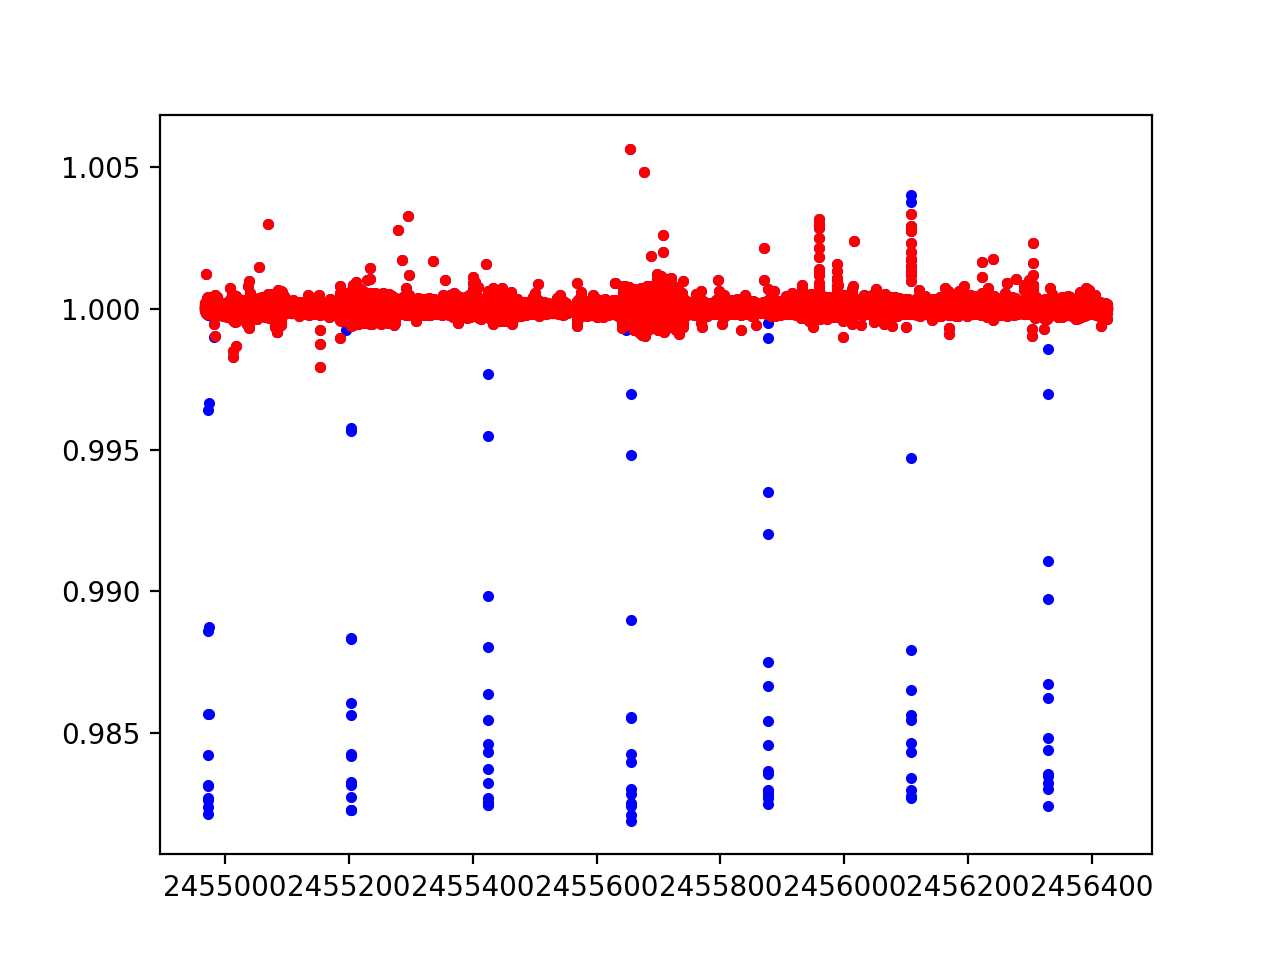

In [12]:
p.figure()
p.plot(time,flux,'b.')
p.plot(lc[:,0]+2454833,lc[:,1],'r.')


In [13]:
lc[:,0] += 2454833
np.savetxt('K16_cln_noecl_notran.txt',lc)